# **<span style="color:green">Image processing tp 3</span>**

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, display

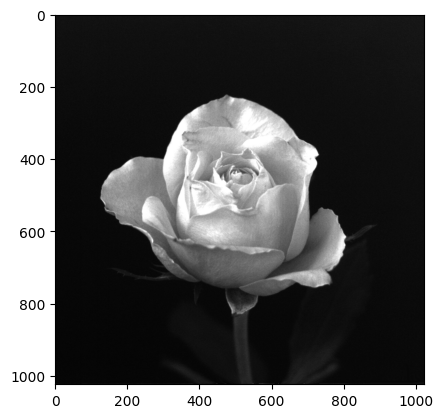

In [5]:
#Chargez l’image « rose_1024.tif »
img = cv.imread('rose.tif')
#affichage d'image
plt.imshow(img)
plt.show()

# *1. Inversion d'une image*

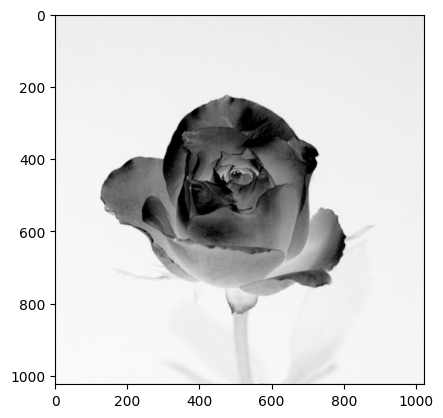

In [6]:
#Utilisez une opération de négatif pour inverser les couleurs de l’image:
neg = 255 - img
plt.imshow(neg)
plt.show()


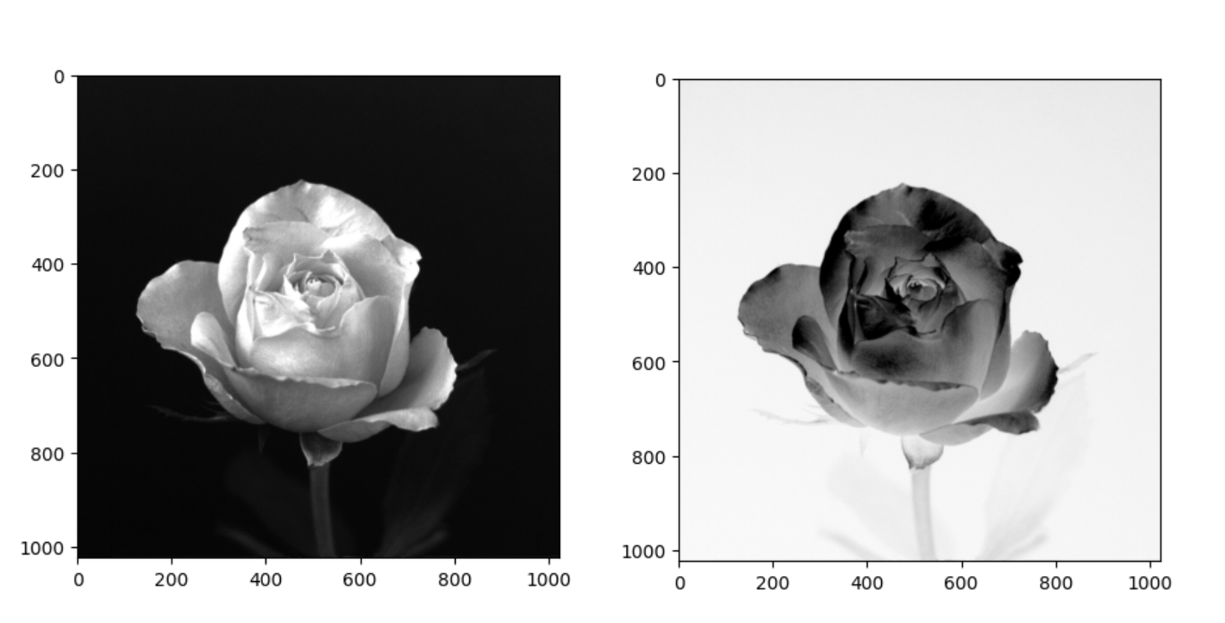

In [7]:
# Comparez l'image originale et l'image inversée en les affichant côte à côte:
display(Image(filename='sidebyside.png'))

# *2. Addition de deux images*

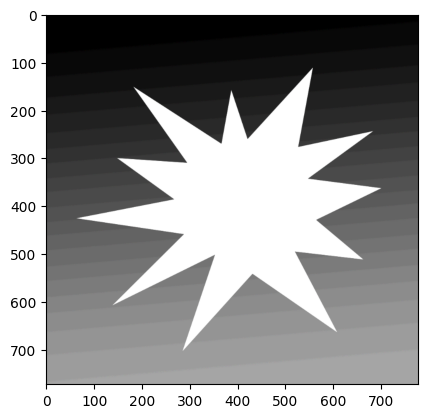

In [8]:
#Chargez deux images (toADD et rose_1024) de même taille ou assurez-vous que les images sont redimensionnées si elles ne sont pas de la même taille :
img2 = cv.imread('toAdd.tif')
#affichage d'image
plt.imshow(img2)
plt.show()

In [14]:
# est ce que il ont la meme taille ? en test 
height1, width1 = img.shape[:2]
print(f"h1 = {height1},  W1 = {width1}")
height2, width2 = img2.shape[:2]
print(f"h2 = {height2},  W2 = {width2}")


h1 = 1024,  W1 = 1024
h2 = 773,  W2 = 778


In [20]:
# fallait les redimensionner
img2_redi = cv.resize(img2, (img.shape[1], img.shape[0]))
print(img.shape)
print(img2_redi.shape)

(1024, 1024, 3)
(1024, 1024, 3)


In [ ]:
# addition manuelle des 2 images
res = np.zeros_like(img)  # empty array to put in the new pixel values, same size as img

# en parcours tous les pixels / S <- somme des pixels
for i in range(img.shape[0]):        # height
    for j in range(img.shape[1]):    # width
        for c in range(img.shape[2]):  # channels RGB
            S = img[i, j, c] + img2_redi[i, j, c]
            if S > 255:       # clipping pour ne pas dépasser 255
                S = 255
            res[i, j, c] = S

cv.imshow("Manual add", res)
cv.waitKey(0)
cv.destroyAllWindows()
 

C:\Users\Bsi\AppData\Local\Temp\ipykernel_25768\2585632422.py:8: RuntimeWarning: overflow encountered in scalar add
  S = img[i, j, c] + img2_redi[i, j, c]


In [11]:
# Addition de deux images avec une fonction
addition = cv.add(img, img2_redi)  # la fct cv.add fait le clipping ( ,255) auto 

cv.imshow("Addition", addition)
cv.waitKey(0)
cv.destroyAllWindows()
#cv.add is optimized and can look weird 

In [18]:
# test adding the same images together
testAdd = cv.add(img,img)
cv.imshow("TEST", testAdd)
cv.waitKey(0)
cv.destroyAllWindows()
#Because each pixel is added to itself, its value doubles, higher brightness

# *3. Rotation d’une image*

In [16]:
dsize = img.shape[:2]
center = (width//2, height//2)  # le point win ndoro usually the middle of the img


In [17]:
angle = 45       # rotate 45°
scale = 0.5      # didnt use org scale/size of the picture for a clearer result  ( 1.0 )


In [18]:
M = cv.getRotationMatrix2D(center, angle, scale) # -> defines how to rotate ( creates a matrix with the math needed for rotation)
rotation = cv.warpAffine(img, M, dsize)  # -> applies the rotation 
cv.imshow("Rotated Image", rotation)
cv.waitKey(0)
cv.destroyAllWindows()


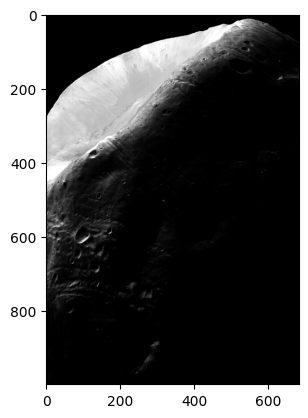

In [6]:
kk= cv.imread('Fig3.tif', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()